##### The Lending_Club_Case_Study

Here the objective is to help the company with 2 objectives:-

1) If the loan is approved still the customer may default which is a possible scenario then the bank is at a loss completely.

2) Loan might have been rejected based on some criteria mismatch but the customer was like to repay the loan in this case the bank will also loose revenue and also possible loss to the borrowser who might go to some other channel for the loan.

Hence a proper analytical solution or tools is needed to overcome thes situations.


In [1]:
# Lets first check the data depedncies and the explanation of each metrics
# making an investigation slowly we would need to decide as which of the features would be not relevant which we would need 
# to delete from the available dataset

import pandas as pd
data = pd.read_excel("./dataset/Data_Dictionary.xlsx")
data

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [2]:
#reading the main dataset available to do an indepth analysis
import pandas as pd

df = pd.read_csv("./dataset/Loan.csv")
df.head()

C:\Users\susha\AppData\Local\Temp\ipykernel_36080\3072790982.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/Loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


https://www.lendingclub.com/foliofn/rateDetail.action

From the above link we get a general understanding as to how different kind of loans are graded. Here we check the category, sub category then we finally have a base rate and adjustment rate with rehgards to any volatilyt based on which finally there are different grades asociated to it.

In [3]:
#listing out the no of columns in the dataset
for x in df.columns:
    print(x)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

Some of the columns we need to remove since that is not relevant to keep in order to predict the overall objective.

delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type

In [4]:
df.drop(columns = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt",\
    "total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt",\
        "last_credit_pull_d","application_type"], inplace = True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


selecting only the dataset which helpful that is we need to select only the people who have fully paid and who are charged off,
 since people who are applying the loan there is no insight which can be generated from that. Fully paid applicant are likely to pay the loan so we have selected that category which is useful.

In [5]:

df = df[df['loan_status']!='Current']
df['loan_status'].value_counts()
df.to_csv("updated.csv", header=True, index=False)

Going through a automated EDA library to have have a basic indepth understanding of the overall available data.

In [6]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
# profile.to_file("output.html")

C:\Users\susha\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\susha\AppData\Local\Temp\ipykernel_36080\2799481646.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp
C:\Users\susha\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
 ... (more hidden) ...C:\Users\susha\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:315: FutureW

In [7]:
df.shape

(38577, 90)

In [8]:
#checking null values count column wise
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 90, dtype: int64

In [9]:
df_missing = df.isna()
df_num_missing = df_missing.sum()
df_num_missing/len(df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.001011
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 90, dtype: float64

In [10]:
# we have 71 columns numeric data
df.select_dtypes(include='number').shape

(38577, 71)

In [11]:
#Performing univariate analysis for numeric type columns

df.select_dtypes(include='number').columns
    #df[x].value_counts().plot.bar()


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_a

In [12]:
# df['loan_amnt'].value_counts().plot.bar()
import seaborn as sns
loan_status = df['loan_status'].value_counts()   
loan_status

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Index(['Fully Paid', 'Charged Off'], dtype='object')
[32950  5627]


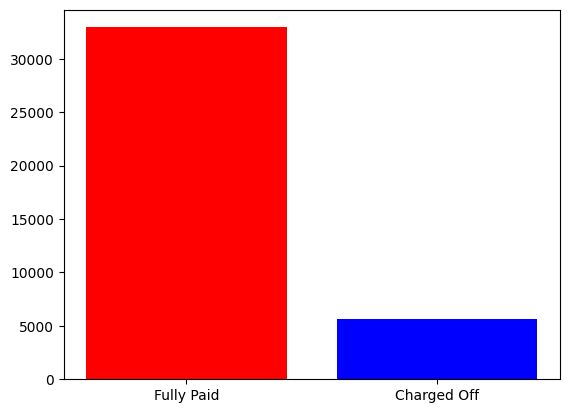

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
print(loan_status.index)
print(loan_status.values)
plt.bar(x=loan_status.index, height=loan_status.values,color=['red','blue'])
plt.show()

From the above diagram we see that the ratio of fully paid customer is huge in numbers hence we conclude that the dataset is not balanced. Also we understand Loan _status if the target column to be predicted.

In [14]:
fully_paid = df[df['loan_status']=='fully_paid']
charged_off = df[df['loan_status']=='charged_off']

In [15]:
!pip install missingno

<AxesSubplot: >

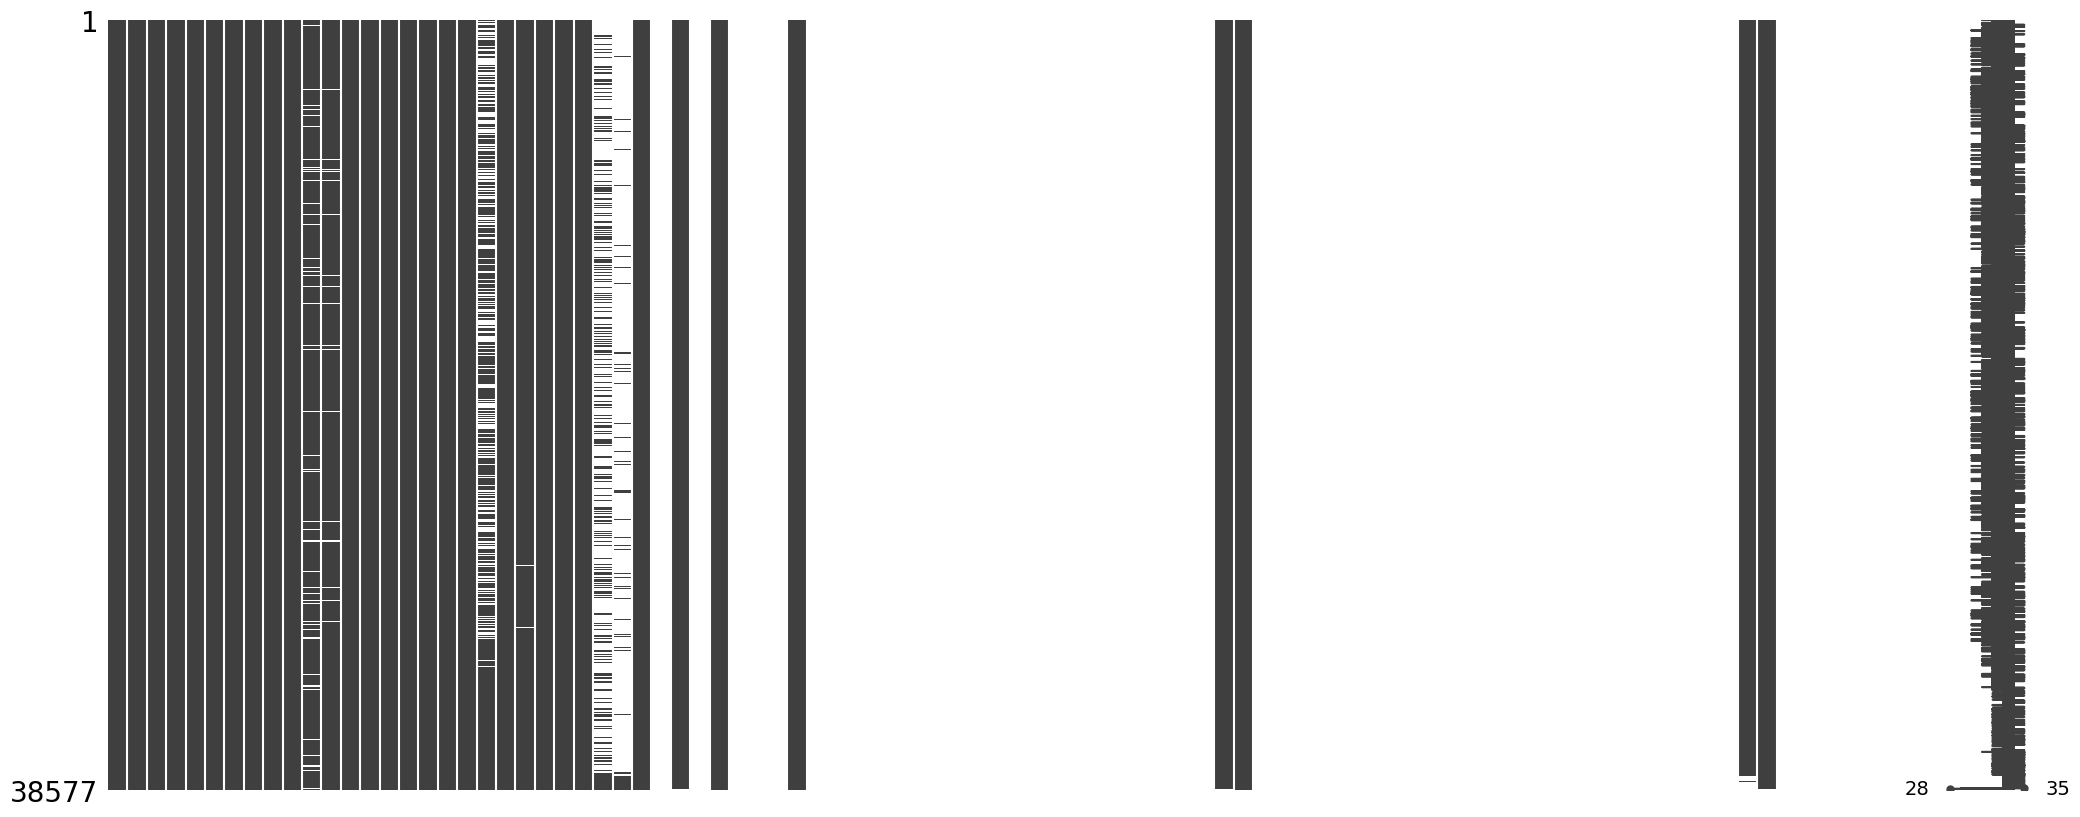

In [16]:
import missingno as msno
msno.matrix(df)

In [17]:
#we have 19 non numeric columns
df.select_dtypes(exclude='number').shape 

(38577, 19)

TypeError: '<=' not supported between instances of 'float' and 'str'

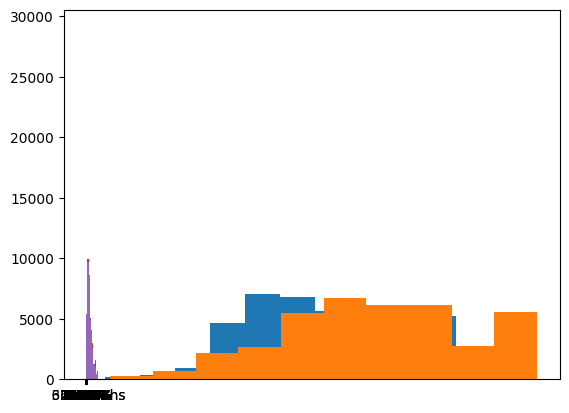

In [18]:
#Performing Univariuate analysis over the available data to see the each metrics
from matplotlib import pyplot as plt
for x in df.columns:
    plt.hist(df[x])